In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_UFC.csv")

In [3]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [4]:
data.columns.values.tolist()

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

In [5]:
df = data.rename(columns = {'R_fighter':'Red', 'B_fighter':'Blue','date':'Date','location':'Location','title_bout':'Title_bout',
                           }, inplace = False)

In [6]:
df.head()

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [7]:
dummy_win_corner = pd.get_dummies(df["Winner"], prefix = "Winner")

In [8]:
df_new = pd.concat([df, dummy_win_corner], axis = 1)

In [9]:
#df_new = df_new.drop(["Winner"], axis = 1)

In [10]:
df_new.head()

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,0,0,1
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0,0,0,1
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,0,0,1
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0,1,0,0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0,1,0,0


## Using the categoric variables we can count directly the number of A_side and B_side winners
### Thus we can observe that the side-A fighters have a higher probability to win, this is obvious because the A-side fighter is the favorite to win


In [11]:
A_side_victories = df_new["Winner_Red"].sum()
B_side_victories = df_new["Winner_Blue"].sum()
Draws = df_new["Winner_Draw"].sum()

total = A_side_victories + B_side_victories + Draws

In [12]:
print("The percentage of victories of A-side is", (A_side_victories/total)*100, "%")
print("The percentage of victories of b-side is", (B_side_victories/total)*100, "%")
print("The percentage of draws is", (Draws/total)*100, "%")

The percentage of victories of A-side is 67.45723172628306 %
The percentage of victories of b-side is 30.92923794712286 %
The percentage of draws is 1.6135303265940901 %


## Also is possible to count the number of Southpaws, switch and orthodox fighters by counting directly from the array
### The number of orthodox fighters is higher. Also obvious tho

In [13]:
counter_orthodox = 0 
counter_southpaw = 0
counter_switch = 0
for i in df_new["B_Stance"]:
    if i == "Orthodox":
        counter_orthodox = counter_orthodox + 1
    elif i == "Southpaw":
        counter_southpaw = counter_southpaw + 1
        
    elif i == "Switch":
        counter_switch = counter_switch + 1      
        
sum_hand = counter_orthodox + counter_southpaw + counter_switch 
print(" Number of Orthodox fighters is", counter_orthodox)
print(" Number of Southpaw fighters is", counter_southpaw)
print(" Number of Switch fighters is", counter_switch)

 Number of Orthodox fighters is 3829
 Number of Southpaw fighters is 975
 Number of Switch fighters is 168


In [14]:
df_new["B_Stance"].value_counts()

Orthodox       3829
Southpaw        975
Switch          168
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [15]:
print(" Percentage of orthodox fighters is", (counter_orthodox/sum_hand)*100, "%")
print(" Percentage of southpaw fighters is", (counter_southpaw/sum_hand)*100, "%")
print(" Percentage of Switch fighters is", (counter_switch/sum_hand)*100, "%")

 Percentage of orthodox fighters is 77.01126307320997 %
 Percentage of southpaw fighters is 19.609814963797266 %
 Percentage of Switch fighters is 3.3789219629927594 %


## Advantage in reach stats for winning or losing ?
### Is the reach important?

In [16]:
df_new["Diff_reach"] = df_new["R_Reach_cms"]-df_new["B_Reach_cms"] 
df_new["Reach_Advantage"] = "NULL"
index_blue = df_new[df_new["Diff_reach"] < 0].index
index_red = df_new[df_new["Diff_reach"] > 0].index
index_nra = df_new[df_new["Diff_reach"] == 0].index
df_new["Reach_Advantage"][index_blue] = "Blue"
df_new["Reach_Advantage"][index_red] = "Red"
df_new["Reach_Advantage"][index_nra] = "Nra"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_new.tail(1000)

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
4144,Dustin Hazelett,Tamdan McCrory,Steve Mazzagatti,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Welterweight,3,0.0,...,185.42,193.04,170.0,22.0,22.0,0,0,1,-5.08,Blue
4145,Gabriel Gonzaga,Josh Hendricks,Steve Mazzagatti,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Heavyweight,3,0.0,...,187.96,193.04,242.0,32.0,29.0,0,0,1,NaN,NULL
4146,Demian Maia,Nate Quarry,Herb Dean,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0.0,...,185.42,182.88,170.0,36.0,31.0,0,0,1,0.00,Nra
4147,Aaron Riley,Jorge Gurgel,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,172.72,175.26,155.0,31.0,27.0,0,0,1,0.00,Nra
4148,Jeremy Stephens,Rafael Dos Anjos,Steve Mazzagatti,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,0.0,...,172.72,180.34,145.0,24.0,22.0,0,0,1,2.54,Red
4149,Mark Bocek,Alvin Robinson,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,172.72,190.50,155.0,26.0,27.0,0,0,1,17.78,Red
4150,Matt Brown,Ryan Thomas,Herb Dean,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Welterweight,3,1.0,...,182.88,190.50,170.0,24.0,27.0,0,0,1,NaN,NULL
4151,Anderson Silva,Patrick Cote,Herb Dean,2008-10-25,"Rosemont, Illinois, USA",Red,True,Middleweight,5,0.0,...,187.96,195.58,185.0,28.0,33.0,0,0,1,15.24,Red
4152,Thiago Alves,Josh Koscheck,David Smith,2008-10-25,"Rosemont, Illinois, USA",Red,False,Welterweight,3,0.0,...,175.26,177.80,170.0,30.0,25.0,0,0,1,-7.62,Blue
4153,Gray Maynard,Rich Clementi,Todd Frederickson,2008-10-25,"Rosemont, Illinois, USA",Red,False,Lightweight,3,0.0,...,175.26,177.80,155.0,32.0,29.0,0,0,1,-5.08,Blue


In [18]:
short_wins = 0
large_wins = 0 
non_adv = 0

for x, y in zip(df_new["Reach_Advantage"], df_new["Winner"]):
    if x == y:
        large_wins = large_wins + 1
    elif y == "Draw":
        non_adv = non_adv +1
    elif x == "Blue" and y =="Red" or x=="Red" and y == "Blue":
        short_wins = short_wins + 1
        
        
    

In [19]:
large_wins/(non_adv+large_wins+short_wins)

0.5153645833333333

In [20]:
df_new.iloc[(df_new.R_wins/(df_new.R_losses+ 1)).sort_values().index]

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
2571,Douglas Silva de Andrade,Zubaira Tukhugov,Osiris de Medeiros,2014-02-15,"Jaragua do Sul, Santa Catarina, Brazil",Blue,False,Featherweight,3,0.0,...,170.18,172.72,135.0,23.0,28.0,1,0,0,0.00,Nra
2849,Antonio Braga Neto,Anthony Smith,Marc Goddard,2013-06-08,"Fortaleza, Ceara, Brazil",Red,False,Middleweight,3,0.0,...,190.50,195.58,185.0,24.0,25.0,0,0,1,2.54,Red
2848,Caio Magalhaes,Karlos Vemola,Dan Miragliotta,2013-06-08,"Fortaleza, Ceara, Brazil",Red,False,Middleweight,3,1.0,...,185.42,185.42,185.0,27.0,25.0,0,0,1,-5.08,Blue
2842,Daniel Sarafian,Eddie Mendez,Dan Miragliotta,2013-06-08,"Fortaleza, Ceara, Brazil",Red,False,Middleweight,3,0.0,...,175.26,185.42,185.0,29.0,30.0,0,0,1,-7.62,Blue
2839,William Patolino,Leonardo Santos,Marc Goddard,2013-06-08,"Fortaleza, Ceara, Brazil",Blue,True,Welterweight,3,0.0,...,180.34,190.50,170.0,33.0,21.0,1,0,0,0.00,Nra
2836,Mitch Clarke,John Maguire,Jerin Valel,2013-06-15,"Winnipeg, Manitoba, Canada",Red,False,Lightweight,3,2.0,...,177.80,185.42,155.0,30.0,27.0,0,0,1,10.16,Red
2830,Alexis Davis,Rosi Sexton,Herb Dean,2013-06-15,"Winnipeg, Manitoba, Canada",Red,False,Women's Bantamweight,3,0.0,...,167.64,172.72,125.0,35.0,28.0,0,0,1,12.70,Red
2818,Tim Kennedy,Roger Gracie,Kim Winslow,2013-07-06,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0.0,...,180.34,187.96,185.0,31.0,33.0,0,0,1,-12.70,Blue
2813,Julie Kedzie,Germaine de Randamie,Randy Corley,2013-07-27,"Seattle, Washington, USA",Blue,False,Women's Bantamweight,3,0.0,...,165.10,162.56,135.0,29.0,32.0,1,0,0,-17.78,Blue
2807,Liz Carmouche,Jessica Andrade,Herb Dean,2013-07-27,"Seattle, Washington, USA",Red,False,Women's Bantamweight,3,0.0,...,167.64,167.64,125.0,21.0,29.0,0,0,1,10.16,Red


In [21]:
Solo_Jon = df_new[df_new["Red"]=="Jon Jones"]

In [22]:
Solo_Jon

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
149,Jon Jones,Anthony Smith,Herb Dean,2019-03-02,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,30.0,31.0,0,0,1,20.32,Red
223,Jon Jones,Alexander Gustafsson,Mike Beltran,2018-12-29,"Los Angeles, California, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,31.0,31.0,0,0,1,12.70,Red
1505,Jon Jones,Ovince Saint Preux,Herb Dean,2016-04-23,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,33.0,28.0,0,0,1,10.16,Red
2103,Jon Jones,Daniel Cormier,Herb Dean,2015-01-03,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,35.0,27.0,0,0,1,30.48,Red
2464,Jon Jones,Glover Teixeira,Dan Miragliotta,2014-04-26,"Baltimore, Maryland, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,34.0,26.0,0,0,1,20.32,Red
2731,Jon Jones,Alexander Gustafsson,John McCarthy,2013-09-21,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,26.0,26.0,0,0,1,12.70,Red
2875,Jon Jones,Chael Sonnen,Keith Peterson,2013-04-27,"Newark, New Jersey, USA",Red,True,Light Heavyweight,5,1.0,...,193.04,213.36,205.0,36.0,25.0,0,0,1,25.40,Red
3101,Jon Jones,Vitor Belfort,John McCarthy,2012-09-22,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,35.0,25.0,0,0,1,25.40,Red
3247,Jon Jones,Rashad Evans,Herb Dean,2012-04-21,"Atlanta, Georgia, USA",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,32.0,24.0,0,0,1,22.86,Red
3354,Jon Jones,Lyoto Machida,John McCarthy,2011-12-10,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,193.04,213.36,205.0,33.0,24.0,0,0,1,25.40,Red


In [23]:
Reach = df_new["R_Reach_cms"]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


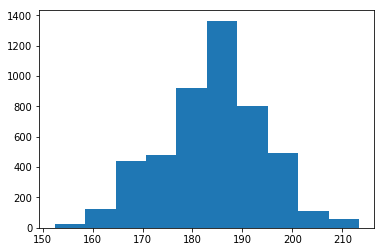

In [24]:
plt.hist(Reach)
plt.show()

In [25]:
dataframe = df_new.sort_values(by = ["Date"], ascending = False)

In [26]:
dataframe.head(1000)

,Red,Blue,Referee,Date,Location,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,162.56,162.56,135.0,31.0,32.0,0,0,1,-7.62,Blue
7,Karolina Kowalkiewicz,Alexa Grasso,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Women's Strawweight,3,1.0,...,160.02,162.56,115.0,25.0,33.0,1,0,0,-5.08,Blue
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,165.10,167.64,125.0,32.0,31.0,0,0,1,0.00,Nra
12,Katlyn Chookagian,Joanne Calderwood,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Flyweight,3,0.0,...,175.26,172.72,125.0,33.0,30.0,0,0,1,7.62,Red
11,Eddie Wineland,Grigorii Popov,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,170.18,175.26,135.0,35.0,34.0,0,0,1,2.54,Red
10,Bevon Lewis,Darren Stewart,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Blue,False,Middleweight,3,1.0,...,190.50,200.66,185.0,28.0,28.0,1,0,0,12.70,Red
8,Ricardo Lamas,Calvin Kattar,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Featherweight,3,0.0,...,172.72,180.34,145.0,31.0,37.0,1,0,0,-2.54,Blue
9,Yan Xiaonan,Angela Hill,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,165.10,160.02,115.0,34.0,29.0,0,0,1,-2.54,Blue
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,170.18,180.34,135.0,32.0,29.0,0,0,1,15.24,Red
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,165.10,167.64,115.0,33.0,28.0,0,0,1,5.08,Red


## Ok after this mini exploratory analisis, what's next? 
### Let's reduce the number of relevant data 
To do that no we eliminate, location, date, and referee columns


In [27]:
undesired = ["Location", "Date", "Referee"]
columns = dataframe.columns.values.tolist()

sublist = [x for x in columns if x not in undesired] # This preserves the order of the columns 

# a = set(columns) # This doesn't preserves the order of columns 
# b = set(undesired)
# sub = a - b
# sub = list(sub)


In [28]:
sublist

['Red',
 'Blue',
 'Winner',
 'Title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_

In [29]:
data_ufc = dataframe[sublist]

In [30]:
data_ufc.head()

,Red,Blue,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
0,Henry Cejudo,Marlon Moraes,Red,True,Bantamweight,5,0.0,4.0,0.0,9.200,...,162.56,162.56,135.0,31.0,32.0,0,0,1,-7.62,Blue
7,Karolina Kowalkiewicz,Alexa Grasso,Blue,False,Women's Strawweight,3,1.0,0.0,0.0,16.250,...,160.02,162.56,115.0,25.0,33.0,1,0,0,-5.08,Blue
1,Valentina Shevchenko,Jessica Eye,Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600,...,165.10,167.64,125.0,32.0,31.0,0,0,1,0.00,Nra
12,Katlyn Chookagian,Joanne Calderwood,Red,False,Women's Flyweight,3,0.0,2.0,0.0,21.875,...,175.26,172.72,125.0,33.0,30.0,0,0,1,7.62,Red
11,Eddie Wineland,Grigorii Popov,Red,False,Bantamweight,3,0.0,0.0,0.0,NaN,...,170.18,175.26,135.0,35.0,34.0,0,0,1,2.54,Red


## Filling NA's for numerical data

In [31]:
data_ufc.describe()
columns = data_ufc.columns.values


In [32]:
# for col in columns:
#     print(col)
#     data[col].fillna(data[col].mean())
exclusion = ["Red", "Blue", "Winner","Title_bout","weight_class","B_Stance", "R_Stance","Reach_Advantage"]
sublist = [y for y in columns if y not in exclusion] 
categorical_to_fill = ["B_Stance", "R_Stance"]


In [33]:
for cols in sublist:
    print(cols)
    data_ufc[cols].fillna(data_ufc[cols].mean(), inplace = True)

no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_longest_win_streak
B_losses
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_opp_TD_pct
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_total_rounds_fought
B_total_time_fought(seconds)
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B

In [34]:
data_ufc.tail(1000)

,Red,Blue,Winner,Title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,...,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_Blue,Winner_Draw,Winner_Red,Diff_reach,Reach_Advantage
4148,Jeremy Stephens,Rafael Dos Anjos,Red,False,Lightweight,3,0.0,0.0,0.0,8.689387,...,172.720000,180.340000,145.000000,24.000000,22.000000,0,0,1,2.540000,Red
4146,Demian Maia,Nate Quarry,Red,False,Middleweight,3,0.0,2.0,0.0,8.666667,...,185.420000,182.880000,170.000000,36.000000,31.000000,0,0,1,0.000000,Nra
4147,Aaron Riley,Jorge Gurgel,Red,False,Lightweight,3,1.0,0.0,0.0,3.833333,...,172.720000,175.260000,155.000000,31.000000,27.000000,0,0,1,0.000000,Nra
4145,Gabriel Gonzaga,Josh Hendricks,Red,False,Heavyweight,3,0.0,0.0,0.0,8.689387,...,187.960000,193.040000,242.000000,32.000000,29.000000,0,0,1,0.132105,NULL
4144,Dustin Hazelett,Tamdan McCrory,Red,False,Welterweight,3,0.0,1.0,0.0,7.333333,...,185.420000,193.040000,170.000000,22.000000,22.000000,0,0,1,-5.080000,Blue
4143,Kenny Florian,Joe Stevenson,Red,False,Lightweight,3,0.0,1.0,0.0,4.125000,...,177.800000,187.960000,145.000000,26.000000,32.000000,0,0,1,10.160000,Red
4142,Brock Lesnar,Randy Couture,Red,True,Heavyweight,5,0.0,2.0,0.0,4.722222,...,190.500000,205.740000,265.000000,45.000000,31.000000,0,0,1,15.240000,Red
4160,Pete Sell,Joshua Burkman,Red,False,Welterweight,3,2.0,0.0,0.0,5.222222,...,180.340000,190.500000,170.000000,28.000000,26.000000,0,0,1,7.620000,Red
4159,Hermes Franca,Marcus Aurelio,Red,False,Lightweight,3,1.0,0.0,0.0,3.000000,...,167.640000,180.340000,155.000000,35.000000,34.000000,0,0,1,-7.620000,Blue
4158,Dan Miller,Matt Horwich,Red,False,Middleweight,3,0.0,0.0,0.0,8.689387,...,185.420000,187.960000,185.000000,30.000000,27.000000,0,0,1,0.132105,NULL


In [35]:
for cols in categorical_to_fill:
    data_ufc.fillna(data_ufc[cols].value_counts().index[0], inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [37]:
#data_ufc.to_csv("data_clean_UFC.csv")

#### At this point we can reduce the number of variables, but in this case i will conserve everything, but remaining with the last stats of fighters (by date)


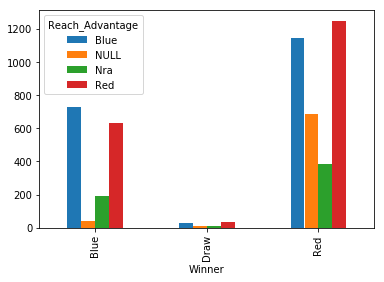

In [36]:
contingence_table = pd.crosstab(data_ufc["Winner"], data_ufc["Reach_Advantage"]).plot(kind = "bar")

In [38]:
contingence_table

In [39]:
n = 30

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
Y = data_ufc["Winner"]
X = data_ufc.drop(["Winner","Red","Reach_Advantage","Blue","R_Stance","B_Stance","weight_class"], axis = 1)


## Como quito los warnings?

In [43]:
rfe = RFE(lr, n)
rfee = rfe.fit(X,Y.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [44]:
print(rfe.support_)

[ True  True False False False False False False False False False False
 False False False  True False False False False False False  True  True
 False  True  True False False False False False False False False False
 False False False False False  True False False  True  True False False
  True  True False False  True False False False False  True False  True
 False False False  True False False False False False False False False
 False False False False False False False False False  True False False
 False False False False  True  True False False  True False False False
 False False False False False False False False False False False  True
 False False False  True False False  True  True False False  True False
 False False False False False  True False False False  True False False
 False False False False  True  True  True False]


In [45]:
rfe.ranking_
X_vars = X.columns.values

In [73]:
true_list = np.array(rfe.support_)
#z = zip(X_vars,true_list)

In [74]:
true_list

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,

In [79]:
a = np.where(true_list == True)

In [76]:
X_vars = np.array(X_vars)

In [80]:
X_vars[a]

array(['Title_bout', 'no_of_rounds', 'B_avg_KD', 'B_avg_SIG_STR_pct',
       'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_opp_KD',
       'B_avg_opp_PASS', 'B_avg_opp_REV', 'B_avg_opp_SIG_STR_pct',
       'B_avg_opp_SUB_ATT', 'B_avg_opp_TD_pct', 'B_total_title_bouts',
       'B_win_by_Decision_Split', 'B_win_by_TKO_Doctor_Stoppage',
       'R_avg_KD', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_pct',
       'R_avg_opp_KD', 'R_avg_opp_REV', 'R_avg_opp_SIG_STR_pct',
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_pct', 'R_win_by_Decision_Split',
       'R_win_by_TKO_Doctor_Stoppage', 'Winner_Blue', 'Winner_Draw',
       'Winner_Red'], dtype=object)